Unsupervised Learning Example: Clustering and Dimensionality Reduction
Step 1: Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


Step 2: Generate a Synthetic Dataset
We'll generate a synthetic dataset for clustering using make_blobs.

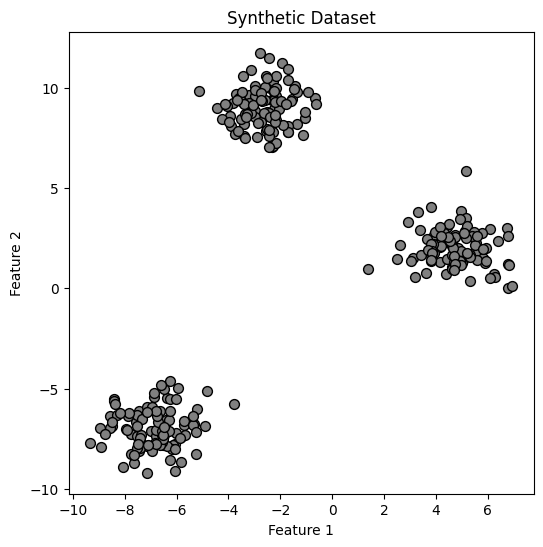

In [2]:
# Create a synthetic dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, edgecolor='k')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Step 3: K-Means Clustering
How It Works: Divides data into K clusters by iteratively updating cluster centers (centroids) and assigning points to the nearest center.
Key Parameters:
n_clusters: Number of clusters to form.
random_state: Ensures reproducibility.
Strengths: Simple and efficient for spherical clusters.
Weaknesses: Assumes clusters are spherical and equally sized.

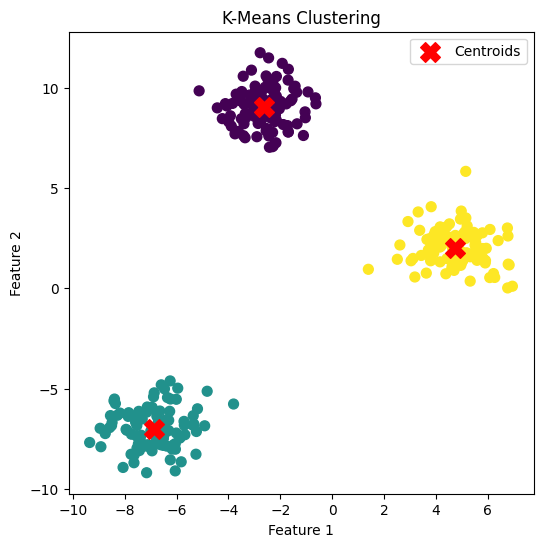

In [3]:
# Step 1: Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_

# Step 2: Visualize the Clusters
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Step 4: DBSCAN (Density-Based Spatial Clustering)
How It Works: Groups points based on density (number of points within a radius). Points in low-density regions are considered noise.
Key Parameters:
eps: Radius to consider neighbors.
min_samples: Minimum points to form a cluster.
Strengths: Can find clusters of arbitrary shapes and handle noise.
Weaknesses: Sensitive to parameters (eps and min_samples).

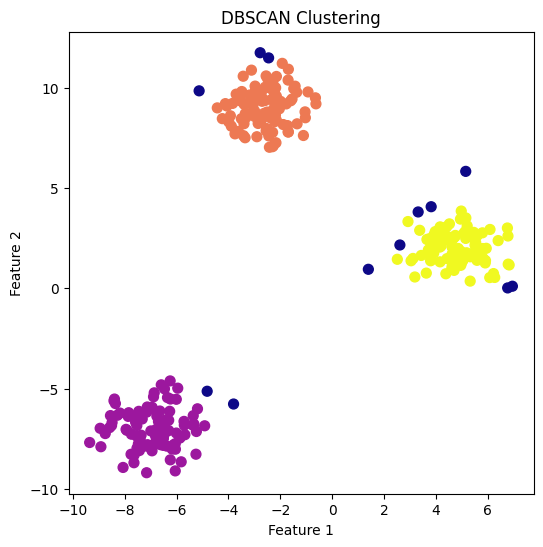

In [4]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)  # eps is the radius for neighborhood, min_samples is the minimum points in a cluster
dbscan.fit(X)
y_dbscan = dbscan.labels_  # -1 indicates noise points

# Visualize the Clusters
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Step 5: Hierarchical Clustering
How It Works: Recursively merges or splits clusters to form a hierarchy. The dendrogram visualizes the process.
Key Terms:
Linkage: Determines how distances between clusters are computed (e.g., ward, complete, average).
Dendrogram: Illustrates the hierarchical structure of clusters.

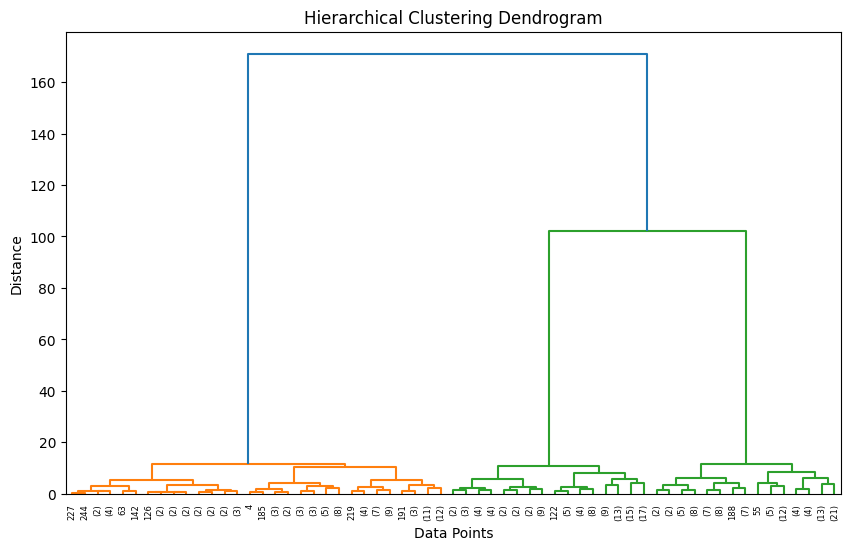

In [5]:
# Perform Hierarchical Clustering
linked = linkage(X, method='ward')  # 'ward' minimizes variance within clusters

# Plot the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)  # Truncate to show top levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Step 6: Dimensionality Reduction with PCA
How It Works: Reduces the number of features by finding new axes (principal components) that capture the most variance in the data.
Key Terms:
Explained Variance: Proportion of dataset variance captured by each principal component.
Strengths: Simplifies high-dimensional data for visualization or modeling.
Weaknesses: Assumes linear relationships between features.

Explained Variance by Principal Components: [0.70669709 0.29330291]


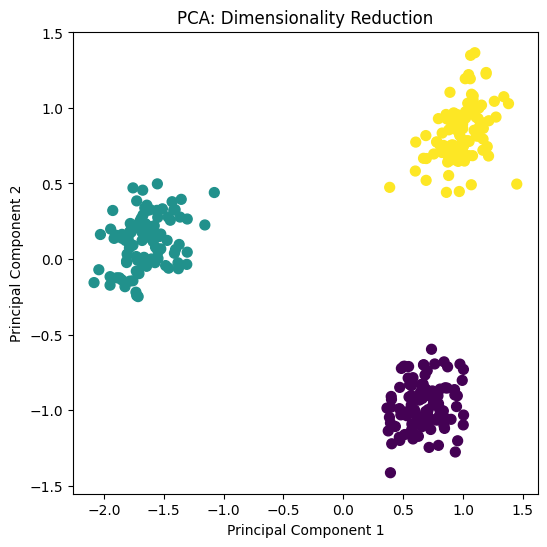

In [6]:
# Standardize the Dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
print("Explained Variance by Principal Components:", pca.explained_variance_ratio_)

# Visualize the Reduced Data
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title("PCA: Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()